# Linear Algebra Review
## Kousuke Ariga (koar8470@cs.washington.edu)
## January 17, 2018

This notebook is meant to be a quick refresher of linear algebra and a brief introduction of NumPy (Python package for scientific computing), and it is by no means a through review. I assume that you have a prior experience of learning linear algebra (such that you have taken a course a while ago). The goal is to go over some of the important properties of matrices and showcase some NumPy codes through a practical example. We use linear regression model as our example, and provide three different approaches, which is algebraic, analytic, and geometric, to solve it. I heavily cite and highly recommend Kolter's review notes on linear algebra[1], however, it seems to be no longer available online.

## Contents
1. Introduction  
    1.1 Boston house prices dataset  
    1.2 Linear regression model
2. Matrices and vectors  
    2.1 Matrix  
    2.2 Vector
3. Basic operations on matrices and vectors  
    3.1 Matrix addition  
    3.2 Scalar matrix multiplication  
    3.3 Matrix vector multiplication  
    3.4 Matrix matrix multiplication
4. Properties of matrices  
    4.1 Linear independence  
    4.2 Rank  
    4.3 Inverse  
    4.4 Transpose  
    4.5 Span and range  
    4.6 Norm  
    4.7 Gradient  
    4.8 Matrix calculus  
    4.9 Dot products  
    4.10 Projections  
    4.11 Orthogonality
5. Conclusion

Appendix  
    A. Linear algebra visualized  
    B. Transpose and 1-dimensional arrays in NumPy  
    C. Outer products in NumPy

Reference

## 1. Introduction

Why is linear algebra important in machine learning? Machine learning methods often involves a large amount of data, and linear algebra provides a clever way to analyze and manipulate them. To make the argument concrete, let's take a look at a sample dataset.

### 1.1 Boston house prices dataset

In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from IPython.display import HTML, Image

np.set_printoptions(suppress=True, linewidth=120, precision=2)

In [48]:
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

The dataset is loaded as an object that has the following attributes.

In [49]:
print(boston.__dir__())

dict_keys(['DESCR', 'data', 'feature_names', 'target'])


You can access the features and target values as NumPy arrays. In array, each row corresponds to a sample. Here, I show the first 10 samples by slicing the array.

In [50]:
print(boston.feature_names)
print(boston.data[:10])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']
[[  0.01  18.     2.31   0.     0.54   6.58  65.2    4.09   1.   296.    15.3  396.9    4.98]
 [  0.03   0.     7.07   0.     0.47   6.42  78.9    4.97   2.   242.    17.8  396.9    9.14]
 [  0.03   0.     7.07   0.     0.47   7.18  61.1    4.97   2.   242.    17.8  392.83   4.03]
 [  0.03   0.     2.18   0.     0.46   7.    45.8    6.06   3.   222.    18.7  394.63   2.94]
 [  0.07   0.     2.18   0.     0.46   7.15  54.2    6.06   3.   222.    18.7  396.9    5.33]
 [  0.03   0.     2.18   0.     0.46   6.43  58.7    6.06   3.   222.    18.7  394.12   5.21]
 [  0.09  12.5    7.87   0.     0.52   6.01  66.6    5.56   5.   311.    15.2  395.6   12.43]
 [  0.14  12.5    7.87   0.     0.52   6.17  96.1    5.95   5.   311.    15.2  396.9   19.15]
 [  0.21  12.5    7.87   0.     0.52   5.63 100.     6.08   5.   311.    15.2  386.63  29.93]
 [  0.17  12.5    7.87   0.     0.52   6.    85.9    6.59   5.   311

In [51]:
print('MEDV')
print(boston.target[:10][:, np.newaxis])

MEDV
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]]


### 1.2 Linear regression model

Linear regression model is one of the most simple statistical models. It assumes that the target variable $y$ can be explained by weighted sum of feature variables $x_1, x_2, \dots, x_n$. In an equation, a house price can be explained as

$$y = w_{CRIM}x_{CRIM} + w_{ZN}x_{ZN} +, \dots, + w_{MEDV}x_{MEDV} + b.$$
    
Is the relationship really that simple?

> Essentially, all models are wrong, but some are useful.
>
> -- <cite>George Box, 1987</cite>

Assuming this model is valid and we know all the weights (including the bias term), we can estimate a house price from the feature values. But we don't know the weights... What do we have? Training samples (features and target value pair)!

If we find weights with which the above equation (at least approximately) holds for the training samples, we can say that our model is a "good" (here I'm intentionally being ambiguous) estimator. How do we find such weights? System of equations!

\begin{align*}
y^1 &= w_{CRIM}x_{CRIM}^1 + w_{ZN}x_{ZN}^1 +, \dots, + w_{MEDV}x_{MEDV}^1 + b \\
y^2 &= w_{CRIM}x_{CRIM}^2 + w_{ZN}x_{ZN}^2 +, \dots, + w_{MEDV}x_{MEDV}^2 + b \\
\vdots & \\
y^n &= w_{CRIM}x_{CRIM}^n + w_{ZN}x_{ZN}^n +, \dots, + w_{MEDV}x_{MEDV}^n + b
\end{align*}

Great, we can solve it (can we?). Let's rewrite the equations with a better notation.

$$
\begin{bmatrix}
y^1 \\
y^2 \\
\vdots \\
y^n
\end{bmatrix}
= \begin{bmatrix}
x_{CRIM}^1 & x_{ZN}^1 & x_{MEDV}^1 & 1 \\
x_{CRIM}^2 & x_{ZN}^2 & x_{MEDV}^2 & 1 \\
\vdots
x_{CRIM}^n & x_{ZN}^n & x_{MEDV}^n & 1
\end{bmatrix}
\begin{bmatrix}
w_{CRIM} \\
w_{ZN} \\
\vdots \\
w_{MEDV} \\
b
\end{bmatrix}
$$

More simply,
$$
\begin{bmatrix}
y^1 \\
y^2 \\
\vdots \\
y^n
\end{bmatrix}
= \begin{bmatrix}
\boldsymbol{x^1} \\
\boldsymbol{x^2} \\
\vdots \\
\boldsymbol{x^n}
\end{bmatrix}
\boldsymbol{w}
$$

or even...,

$$\boldsymbol{y} = X\boldsymbol{w}$$

Yes, this is beautiful. This notation is used in linear algebra, and it is a very powerful tool for us to tackle machine learing problems. The objective here is to find parameters $\boldsymbol{w}$ that makes this equation valid, i.e. to solve the equation for $\boldsymbol{w}$. We call this process to learn a model (parameterized function) from data. 

##  2. Matrices and vectors

###  2.1 Matrix

$$A=
\begin{bmatrix}
    0 & 1 & 2 \\
    3 & 4 & 5
\end{bmatrix}, \quad A \in \mathbb{R}^{2\times3}$$

A matrix is a rectangular array of numbers. The dimension of matrix is number of rows by number of columns. $A_{ij}$ is the $i, j$ entry of $A$, which is in the $i$ th row and the $j$ th column.

In [52]:
A = np.array(np.arange(0, 6)).reshape((2, 3))
print(A)
print(A.shape)

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        print("{},{} entry: {}".format(i, j, A[i, j]))##  Matrices and Vectors

[[0 1 2]
 [3 4 5]]
(2, 3)
0,0 entry: 0
0,1 entry: 1
0,2 entry: 2
1,0 entry: 3
1,1 entry: 4
1,2 entry: 5


### 2.2 Vector

$$\boldsymbol{y} = 
\begin{bmatrix}
    0 \\
    2 \\
    4 \\
    6
\end{bmatrix}
, \quad \boldsymbol{y} \in \mathbb{R}^4$$

A vector is a $n\times 1$ matrix. Here $\boldsymbol{y}$ is said to be a 4-dimensional vector because it has 4 elements in it. $\boldsymbol{y}_i$ denotes the $i$ th element of $\boldsymbol{y}$.

In [53]:
y = np.array(2*np.arange(0, 4))
print(y)
print(y.shape)

for i in range(y.shape[0]):
    print("{} element: {}".format(i, y[i]))

[0 2 4 6]
(4,)
0 element: 0
1 element: 2
2 element: 4
3 element: 6


## 3. Basic operations on matrices and vectors

### 3. 1 Matrix addition

$\begin{bmatrix}
1 & 0 \\
2 & 5 \\
3 & 1
\end{bmatrix}
+ \begin{bmatrix}
4 & 0.5 \\
2 & 5 \\
0 & 1
\end{bmatrix}
= \begin{bmatrix}
5 & 0.5 \\
4 & 10 \\
3 & 2
\end{bmatrix}$

The shapes have to be the same.

In [54]:
A = np.array([[1, 0],
              [2, 5],
              [3, 1]])
B = np.array([[4, 0.5],
              [2, 5],
              [0, 1]])
assert A.shape == B.shape
print(A + B)

[[ 5.   0.5]
 [ 4.  10. ]
 [ 3.   2. ]]


### 3.2 Scalar matrix multiplication

$3 \times \begin{bmatrix}
1 & 0 \\
2 & 5 \\
3 & 1
\end{bmatrix}
= \begin{bmatrix}
3 & 0 \\
6 & 15 \\
9 & 3
\end{bmatrix}$

In [55]:
A = np.array([[1, 0],
              [2, 5],
              [3, 1]])
print(3*A)

[[ 3  0]
 [ 6 15]
 [ 9  3]]


### 3.3 Matrix vector multiplication

$A\boldsymbol{x} = \boldsymbol{y}$

$A := m \times n$ matrix (m rows, n columns)  
$\boldsymbol{x} := n \times 1$ matrix (n-dimensional vector)  
$\boldsymbol{y} := m \times 1$ matrix (m-dimensional vector)  

To get $y_i$, multiply $A$'s ith row with vector $x$ element-wise, and add them up.

$\begin{bmatrix}
1  & 2  & 1 & 5 \\
0  & 3  & 0 & 4 \\
-1 & -2 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
1 \\
3 \\
2 \\
1
\end{bmatrix}
= ?$

Hint: $\mathbb{R}^{3\times4} \times \mathbb{R}^{4\times1} = \mathbb{R}^{3\times1}$

In [56]:
A = np.array([[1, 2, 1, 5],
              [0, 3, 0, 4],
              [-1, -2, 0, 0]])
x = np.array([[1],
              [3],
              [2],
              [1]])
y = np.dot(A, x)
y = A.dot(x)  # Another way to get dot product
assert x.shape[0] == A.shape[1]
print(y)

[[14]
 [13]
 [-7]]


### 3.4 Matrix matrix multiplication

$AB = C$

$A := l \times m$ matrix (l rows, m columns matrix)  
$B := m \times n$ matrix (m rows, n columns matrix)  
$C := l \times n$ matrix (l rows, n columns matrix)  

$\begin{bmatrix}
1 & 4 \\
5 & 3 \\
2 & 6
\end{bmatrix}
\begin{bmatrix}
1 & 8 & 7 & 4 \\
5 & 6 & 2 & 3
\end{bmatrix}
= ?$

Hint: $\mathbb{R}^{3\times2} \times \mathbb{R}^{2\times4} = \mathbb{R}^{3\times4}$

Note that $AB$ and $BA$ are not the same, i.e. matrix multiplication is NOT commutative. Actually, the latter is not even defined. Check the dimensions.

In [57]:
A = np.array([[1, 4],
              [5, 3],
              [2, 6]])
B = np.array([[1, 8, 7, 4],
              [5, 6, 2, 3]])
print(A)
print(B)

[[1 4]
 [5 3]
 [2 6]]
[[1 8 7 4]
 [5 6 2 3]]


In [58]:
print(A.dot(B))

[[21 32 15 16]
 [20 58 41 29]
 [32 52 26 26]]


In [59]:
try:
    print(B.dot(A))
except ValueError as e:
    print(e)

shapes (2,4) and (3,2) not aligned: 4 (dim 1) != 3 (dim 0)


## 4. Properties of matrices

Is linear algebra all about saving papers? Definitely NO! Do you remember terminologies such as *linear independence*, *rank*, *span*, etc that you learned in the linear algebra course? Did you get the idea of those concepts? Being able to calculate them is important, but understanding the essense and usage of those comcept is more (at least as) important for the purpose of this course. Let's review those concepts through the Boston house price example. The goal is to solve this equation.

$$\boldsymbol{y} = X\boldsymbol{w}$$

where $X\in \mathbb{R}^{m\times n}$ and $m>n$. $m$ is greater than $n$ because there are more samples than the number of features (remember rows are samples). In other words, $X$ is a vertically long matrix.

### 4.1 Linear independence

Here, let's assume that all the features (columns of $X$) are *linearly independent*.

> A set of vectors $\{x_1, x_2, \dots, x_n\}\in\mathbb{R}^m$ is said to be *(linearly) independent* if no vector can be represented as a linear combination of the remaining vectors. [2]

Otherwise, it is *linearly dependent*. For example, if we have temperature in Fahrenheit and in Celsius as two different features, the latter is represented in terms of the first as

$$FAHRENHEIT = \frac{9}{5}CELSIUS + 32.$$

Such features are linearly dependent. For another example, if we have categorical features like gender, we could have two columns one for male and the other for female. For male samples we can have ones in the male column and zeros in the female column, and do the opposite for female samples. Did you notice that we have a linear dependence here because these features can be represented in the form

$$FEMALE = -MALE + 1.$$

###  4.2 Rank

For a matrix $A \in \mathbb{R}^{m\times n}$ where $m>n$, if its columns are *linearly independent*, it is said to be *full rank*. Formally,

> The *column rank* of a matrix $A \in \mathbb{R}^{m\times n}$ is the size of the largest subset of columns of $A$ that constitute a *linearly independent* set. With some abuse of terminology, this is often referred to simply as the number of linearly independent columns of $A$. In the same way, the *row rank* is the largest number of rows of $A$ that constitute a *linearly independent* set. 
>
> For any matrix $A \in \mathbb{R}^{m\times n}$, it turns out that the *column rank* of $A$ is equal to the *row
rank* of $A$ (though we will not prove this), and so both quantities are referred to collectively as the *rank* of $A$, denoted as $rank(A)$.
>
> For $A \in \mathbb{R}^{m\times n}$, $rank(A) \leq \min(m, n)$. If $rank(A) = \min(m, n)$, then $A$ is said to be *full rank*. [2] 

Therefore, the first statement holds.

So, again, let's assume that the columns of $X$ are *linearly independent*, i.e. $X$ is *full rank*. Here's our first attempt to solve the equation for $\boldsymbol{w}$.

#### The first attempt
$$\begin{align}
    \boldsymbol{y} &= X\boldsymbol{w} \\
    \boldsymbol{w} &= X^{-1}\boldsymbol{y}
\end{align}$$

### 4.3 Inverse
> The *inverse* of a square matrix $A\in\mathbb{R}^{n\times n}$ is denoted $A^{-1}$, and is the unique matrix such that
>
> $$A^{-1}A=I=AA^{-1}.$$
>
> Note that not all matrices have *inverses*. Non-square matrices, for example, do not have *inverses* by definition. However, for some square matrices $A$, it may still be the case that $A^{−1}$ may not exist. In particular, we say that $A$ is *invertible* or *non-singular* if $A^{−1}$ exists and *non-invertible* or *singular* otherwise. In order for a square matrix $A$ to have an *inverse* $A^{−1}$, then $A$ must be *full rank*. [2]

Now, remember that our $X$ is a vertically long matrix i.e. non-square, and cannot be inverted. Threfore, we can't do $\boldsymbol{w} = X^{-1}\boldsymbol{y}$. What can we do, then? Here's our second attempt.

#### The second attempt
$$\begin{align}
    \boldsymbol{y} &= X\boldsymbol{w} \\
    X^{T}\boldsymbol{y} &= X^{T}X\boldsymbol{w} \\
    \boldsymbol{w} &= {(X^{T}X)}^{-1}X^{T}\boldsymbol{y}    
\end{align}$$

### 4.4 Transpose

> By convention, an n-dimensional vector is often thought of as a matrix with n rows and 1 column, known as a column vector. If we want to explicitly represent a row vector — a matrix with 1 row and n columns — we typically write $\boldsymbol{x}^T$. [2]

$$\boldsymbol{y}
= \begin{bmatrix}
0 \\
1 \\
2 \\
3
\end{bmatrix},
\quad\boldsymbol{y}^T
= \begin{bmatrix}
0 & 1 & 2 & 3
\end{bmatrix},
\quad \boldsymbol{y}\in\mathbb{R}^4$$

The *transpose* can be generalized to matrices.

> The *transpose* of a matrix results from "flipping" the rows and columns. Given a matrix $A\in\mathbb{R}^{m\times n}$, its transpose, written $A^T\in\mathbb{R}^{n\times m}$, is the $n\times m$ matrix whose entries are given by
>
> $$(A^T)_{ij} = A_{ji}.$$ [2]

$$A
= \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6 
\end{bmatrix},
\quad A^T
= \begin{bmatrix}
1 & 3 & 5 \\
2 & 4 & 6
\end{bmatrix}$$

What is the dimension of $A^TA$?

In [60]:
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])
print(A)
print(np.dot(A.T, A))

[[1 2]
 [3 4]
 [5 6]]
[[35 44]
 [44 56]]


$A^TA$ is always a square matrix ($\mathbb{R}^{n\times m}\mathbb{R}^{m\times n} = \mathbb{R}^{n\times n}$), and if $A$ is *full rank*, it is also *invertible*.

#### The second attempt
$$\begin{align}
    \boldsymbol{y} &= X\boldsymbol{w} \\
    X^{T}\boldsymbol{y} &= X^{T}X\boldsymbol{w} \\
    \boldsymbol{w} &= {(X^{T}X)}^{-1}X^{T}\boldsymbol{y}    
\end{align}$$

Note that the second equality of the second attempt multiplies both sides by the *transpose* of $X$. This is to make $X$ *invertible* so that the third line is valid. This is a correct algebraic approach.

Why don't we get the intuition behind the algebraic manipulations. Consider the linear system

$$\boldsymbol{y} = X\boldsymbol{w}$$

where we have some data such that

$$\boldsymbol{y} = \begin{bmatrix}
1 \\
2 \\
2
\end{bmatrix},
\quad
X = \begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{bmatrix}$$

for simplicity. This equation is saying that $\boldsymbol{y}$ is a linear combination of column vectors of $X$, i.e.

$$\begin{bmatrix}
1 \\
2 \\
2
\end{bmatrix}
= w_1\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
+ w_2\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}.$$

### 4.5 Span

However, there are no such weights. In the linear algebra's terminology, $\boldsymbol{y}$ doesn't lie in the *column space* of $X$, or the space that column vectors of $X$ *spans*. Formally, 

> The *span* of a set of vectors $\{\boldsymbol{x}_1, \boldsymbol{x}_2, \dots, \boldsymbol{x}_n\}$ is the set of all vectors that can be expressed as a linear combination of $\{\boldsymbol{x}_1, \boldsymbol{x}_2, \dots, \boldsymbol{x}_n\}$. That is,
>
> $$\text{span}(\{\boldsymbol{x}_1, \dots, \boldsymbol{x}_n\}) = \Big\{v:v=\sum_{i=1}^{n}\alpha_{i}\boldsymbol{x}_{i}, \alpha_{i}\in\mathbb{R}\Big\}.$$ [2]

Especially, when $\boldsymbol{x}$'s are the columns of a matrix $X$, their *span* is said to be the *range* or the *column space* of $X$ and denoted $\mathcal{R}(X)$.

Back to the equation, although the target vector $\boldsymbol{y}$ is 3-dimensional, there are only two column vectors that *span* the space, i.e. the *range* of $X$ is just a 2-dimensional plane. Therefore, there certainly exists 3-dimensional vectors that don't lie on this space, like our $\boldsymbol{y}$. Visually, it looks something like this.

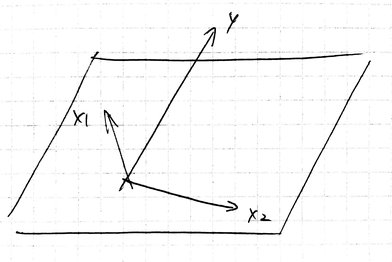

In [61]:
Image('data/column-space.png')

But we want to represent $\boldsymbol{y}$ in terms of $\boldsymbol{x}_i$'s. The best we can do is to find a vector that lies in the *range* of $X$, but is also as close as possible to $\boldsymbol{y}$.

### 4.6 Norm

This objective can be formulated by using *norm* by saying to find $\boldsymbol{w}$ that minimizes $||y - X\boldsymbol{w}||_2$. 

> A norm of a vector $\Vert x\Vert$ is informally a measure of the “length” of the vector. For example, we have the commonly-used Euclidean or $\ell_2$ norm,
>
> $$\Vert\boldsymbol{x}\Vert_2 = \sqrt{\sum_{i=1}^nx_i^2}.$$
>
> Note that $\Vert \boldsymbol{x}\Vert_2^2 = \boldsymbol{x}^T\boldsymbol{x}$. [2]

If you take the *norm* of difference of vectors, it is a measure of distance between them. There are several types of norms, but another popular one is $\ell_1$ norm. Given a vector $\boldsymbol{x}\in\mathbb{R}^n$,

$${\Vert\boldsymbol{x}\Vert}_1 = \sum_{i=0}^{n}|x_i|$$

Let's use $\ell_2$ norm as a measure of distance for now. For convinience, we can minimize the square of $\ell_2$ norm without loss of generality. To find weights that minimizes $\Vert\boldsymbol{y} - X\boldsymbol{w}\Vert_2^2$, we can take the derivative of it with respect to $\boldsymbol{w}$ and set to zero. Easy, right?

### 4.7 Gradient

To this end, the notion of *gradient*, which is a natural extension of partial derivatives to a vector setting, comes in handy.

> Suppose that $f:\mathbb{R}^{m\times n} \rightarrow \mathbb{R}$ is a function that takes as input a matrix $A$ of size $m\times n$ and
returns a real value. Then the gradient of $f$ (with respect to $A\in\mathbb{R}^{m\times n}$) is the matrix of partial derivatives, defined as:
>
> $$\nabla_{A}f(A)\in \mathbb{R}^{m\times n}=\begin{bmatrix}
\frac{\partial f(A)}{\partial A_{11}} & \frac{\partial f(A)}{\partial A_{12}} & \dots & \frac{\partial f(A)}{\partial A_{1n}} \\
\frac{\partial f(A)}{\partial A_{21}} & \frac{\partial f(A)}{\partial A_{22}} & \dots & \frac{\partial f(A)}{\partial A_{2n}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f(A)}{\partial A_{m1}} & \frac{\partial f(A)}{\partial A_{m2}} & \dots & \frac{\partial f(A)}{\partial A_{mn}}
\end{bmatrix}$$
>
> i.e., an $m\times n$ matrix with
>
> $${(\nabla_{A}f(A))}_{ij} = \frac{\partial f(A)}{\partial A_{ij}}.$$
>
> Note that the size of $\nabla_{A}f(A)$ is always the same as the size of $A$. So if, in particular, $A$ is just a vector $x\in\mathbb{R}^n$,
>
> $$\nabla_{x}f(x)=\begin{bmatrix}
\frac{\partial f(x)}{\partial x_{1}} \\
\frac{\partial f(x)}{\partial x_{2}} \\
\vdots \\
\frac{\partial f(x)}{\partial x_{mx}}
\end{bmatrix}$$ [2]

Let $RSS(\boldsymbol{w})$ denote $\Vert y - X\boldsymbol{w}\Vert_2^2$, meaning resisual sum of squares. Minimize $RSS(\boldsymbol{w})$ by taking its *gradient* with respect to $\boldsymbol{w}$ and set to zero.

\begin{align}
RSS(\boldsymbol{w}) &= \Vert\boldsymbol{y} - X\boldsymbol{w}\Vert_2^2 \\
&= {\Bigg(\sqrt{\sum_{i=0}^{m}(y_i - \boldsymbol{x}^i\boldsymbol{w})^2}\Bigg)}^2 \\
&= \sum_{i=0}^{m}{\big(y_i - \boldsymbol{x}^i\boldsymbol{w}\big)}^2
\end{align}

\begin{align}
\frac{\partial}{\partial w_k}RSS(\boldsymbol{w})
&= \frac{\partial}{\partial w_k}\sum_{i=0}^{m}{\big(y_i - \boldsymbol{x}^i\boldsymbol{w}\big)}^2 \\
&= \frac{\partial}{\partial w_k}\sum_{i=0}^{m}{\big(y_i-\sum_{j=0}^nx_j^iw_j\big)}^2 \\
&= \sum_{i=0}^{m}{\frac{\partial}{\partial w_k}\big(y_i - \sum_{j=0}^nx_j^iw_j\big)}^2 \\
&= \sum_{i=0}^{m}{2\big(y_i - \sum_{j=0}^nx_j^iw_j\big)\frac{\partial}{\partial w_k}\big(y_i - \sum_{j=0}^nx_j^iw_j\big)} \\
&= -2\sum_{i=0}^{m}{(y_i - \boldsymbol{x}^i\boldsymbol{w})x_k^i} \\
&= -2X_k^T(\boldsymbol{y} - X\boldsymbol{w}) \quad (X_k \text{ denotes k-th column of }X) \\
\end{align}

Therefore,

$$\nabla_w RSS(\boldsymbol{w}) = -2X^T(\boldsymbol{y} - X\boldsymbol{w}).$$

By setting the *gradient* to a zero vector,

\begin{align}
\nabla_w RSS(\boldsymbol{w}) &= \boldsymbol{0} \\
-2X^T(\boldsymbol{y} - X\boldsymbol{w}) &= \boldsymbol{0} \\
X^T\boldsymbol{y} &= X^TX\boldsymbol{w} \\
\boldsymbol{w} &= {(X^TX)}^{-1}X^T\boldsymbol{y}
\end{align}

Yay! We got the same answer as the algebraic solution by an analytical approach!

### 4.8 Matrix calculus

Don't worry, you don't have to calculate this all the time. The *gradient* is a special case of matrix calculus, where we take the derivative of a scalar function with respect to a vector. Similarly, there are cases we take the derivative of vector with respect to vector and derivative of scalar function with respect to matrix, etc. Fortunatelly, matrix/vector calculus can be done by natural analogies of multivariable calculus, and here are some formulas that we can use.

\begin{array}{c c}
f                 & \frac{\partial f}{\partial x} \\\hline
A\boldsymbol{x}   & A^T \\
\boldsymbol{x}^TA & A \\
\boldsymbol{x}^T\boldsymbol{x} & 2\boldsymbol{x} \\
\boldsymbol{x}^T\boldsymbol{x} & A\boldsymbol{x}+A^T\boldsymbol{x} \\
\end{array}

Therefore,

\begin{align}
\frac{\partial}{\partial\boldsymbol{w}}RSS(\boldsymbol{w})
&= \frac{\partial}{\partial\boldsymbol{w}}\Vert\boldsymbol{y} - X\boldsymbol{w}\Vert_2^2 \\
&= \frac{\partial}{\partial\boldsymbol{w}}{(\boldsymbol{y} - X\boldsymbol{w})}^T(\boldsymbol{y} - X\boldsymbol{w}) \\
&= 2(\boldsymbol{y} - X\boldsymbol{w})\frac{\partial}{\partial\boldsymbol{w}}(\boldsymbol{y} - X\boldsymbol{w}) \\
&= -2(\boldsymbol{y} - X\boldsymbol{w})X^T \\
\end{align}

The rest is the same.

### 4.9 Dot product

I will give another geometric perspective to the linear regression solution. To this end, let me introduce several more concepts.

It's kind of silly to introduce *dot product* (also known as *inner product*) here since we have been using it extensively, but I wanted to make sure that we have the same picture in our mind. The *dot product* of two vectors can be obtained by taking their correxponding elements, multiply them, and add them together. For example, given

$$\boldsymbol{u}=
\begin{bmatrix}
u_1 \\
u_2
\end{bmatrix}
\quad\boldsymbol{v}=
\begin{bmatrix}
v_1 \\
v_2
\end{bmatrix},$$

$$\boldsymbol{u}\cdot\boldsymbol{v}=
\begin{bmatrix}
u_1 \\
u_2
\end{bmatrix}\cdot
\begin{bmatrix}
v_1 \\
v_2
\end{bmatrix}=
u_1v_1+u_2v_2,$$

which is in general case where $\mathbf{u},\mathbf{v}\in\mathbb{R}^{n}$,

$$\sum_{i=1}^{n}u_{i}v_{i}.$$

So, *dot product* seems to be an operator that maps vectors to a scalar value, but how can we interpret it?

> To tackle this question I'm going to present an alternative (but equivalent!) way to define the *dot product*: given vectors $\boldsymbol{u}$ and $\boldsymbol{v}$, let $theta$ be the angle between them, and define their *dot product* to be:
> 
> $$\boldsymbol{u}\cdot\boldsymbol{v}=\Vert\boldsymbol{u}\Vert\Vert\boldsymbol{v}\Vert \text{cos}\theta.$$ [2]

Note that the *dot product* is represented in terms of the magnitude of the vectors and importantly, the angle between them. This is the basis of our geometric intuition.

By the way, if you want to learn why these definitions are equivalent (the duality of *dot products*), check out YouTube playlist called [Essense of linear algebra](https://www.youtube.com/watch?v=kjBOesZCoqc&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) [3]. He has done an excellent job.

Consider the following vector pairs.

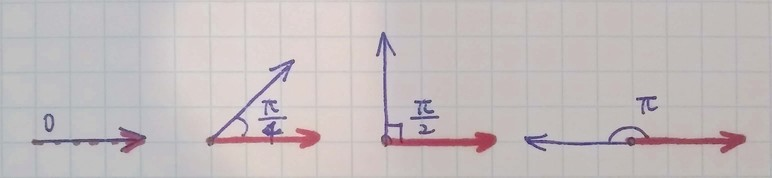

In [62]:
Image('data/dot-products.png')

Recall that

$$\text{cos}0=1\quad\text{cos}\frac{\pi}{4}=\frac{1}{\sqrt{2}}\quad\text{cos}\frac{\pi}{2}=0\quad\text{cos}\pi=-1.$$

Therefore, the *dot products* of the given vector pairs are, respectively,

$$\Vert a\Vert\Vert b\Vert\quad\frac{1}{\sqrt{2}}\Vert a\Vert\Vert b\Vert\quad 0\quad -\Vert a\Vert\Vert b\Vert.$$

Notice that the *dot product* is maximized when the two vectors are perfectly aligned ($\text{argmax}_\theta(\text{cos}\theta)=0$) and gets smaller as their divergence grows. In this sense, the *dot product* works as a measure of the similarity between vectors.

### 4.10 Projections

Now, we'd like to think about something called *projection*. I assume you all have learned them in geometry or physics class. Basically, we want to give a name to the following component.

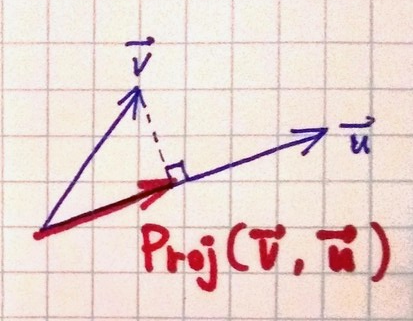

In [63]:
Image('data/projection.png')

The formal definition is as following.

> The *projection* of a vector $y\in\mathbb{R}^m$ onto the span of $\{\boldsymbol{x}_1, \dots, \boldsymbol{x}_n\}$ (here we assume $\boldsymbol{x}_i\in\mathbb{R}^m$) is the vector $\boldsymbol{v}\in\text{span}(\boldsymbol{x}_1,\dots,\boldsymbol{x}_n\})$, such that $\boldsymbol{v}$ is as close as possible to $\boldsymbol{y}$, as measured by the Euclidean norm $\Vert \boldsymbol{v}-\boldsymbol{y}\Vert_2$. We denote the *projection* as $\text{Proj}(\boldsymbol{y};\{\boldsymbol{x}_1,\dots,\boldsymbol{x}_n\})$ and can define it formally as,
>
> $$\text{Proj}(\boldsymbol{y}; \{\boldsymbol{x}_1,\dots,\boldsymbol{x}_n\})=\text{argmin}_{v\in\text{span}(\{\boldsymbol{x}_1,\dots,\boldsymbol{x}_n\})}\Vert\boldsymbol{y}-\boldsymbol{v}\Vert_2.$$ [2]

When we project onto the span of single vector, like the above image, the *projection* is calculated by

$$\text{Proj}(\boldsymbol{v}, \boldsymbol{u}) =\Vert\boldsymbol{v}\Vert\text{cos}\theta\frac{\boldsymbol{u}}{\Vert\boldsymbol{u}\Vert}.$$

Notice that the *projection* is a vector, i.e. it has a direction. The $\Vert\boldsymbol{v}\Vert\text{cos}\theta$ part defines the length of *projection* and the $\frac{\boldsymbol{u}}{\Vert\boldsymbol{u}\Vert}$ part defines its direction. Using the definition of *dot products*,

$$\text{Proj}(\boldsymbol{v}, \boldsymbol{u}) =\Vert\boldsymbol{v}\Vert\text{cos}\theta\frac{\boldsymbol{u}}{\Vert\boldsymbol{u}\Vert}
=\frac{\boldsymbol{u}\cdot\boldsymbol{v}}{\Vert\boldsymbol{u}\Vert}\frac{\boldsymbol{u}}{\Vert\boldsymbol{u}\Vert}$$

If $\boldsymbol{u}$ is a unit vector, $\Vert\boldsymbol{u}\Vert=1$, therefore,
$$\text{Proj}(\boldsymbol{v}, \boldsymbol{u})=(\boldsymbol{u}\cdot\boldsymbol{v})\boldsymbol{u}.$$

> It turns out that this is a very useful construction. For example, *projections* give us a way to make *orthogonal* things. By the nature of “projecting” vectors, if we connect the endpoints of $\boldsymbol{v}$ with its *projection* $\text{Proj}(\boldsymbol{v},\boldsymbol{u})$, we get a vector *orthogonal* to our reference direction $\boldsymbol{u}$. In other words, the vector $\boldsymbol{v}−\text{Proj}(\boldsymbol{v},\boldsymbol{u})$ is *orthogonal* to $\boldsymbol{v}$. [1]

### 4.11 Orthogonality

When we say things are *orthogonal*, it basically means they are perpendicular. But the notion is more general and can be extended to higher dimensional spaces. The formal definition is the following.

> Two vectors $\boldsymbol{x},\boldsymbol{y}\in\mathbb{R}^n$ are *orthogonal* if $\boldsymbol{x}^T\boldsymbol{y} = 0$. A vector 
$\boldsymbol{x}\in\mathbb{R}^n$ is normalized if
$\Vert x\Vert_2=1$. A square matrix $U\in\mathbb{R}^{n\times n}$ is *orthogonal* (note the different meanings when
talking about vectors versus matrices) if all its columns are *orthogonal* to each other and are normalized (the columns are then referred to as being orthonormal). [2]

Note that if a vector $\boldsymbol{v}\in\mathbb{R}^{n}$ is in the *span* of *orthogonal* vectors $\boldsymbol{u}_1, \boldsymbol{u}_2, \dots, \boldsymbol{u}_n$, then $\boldsymbol{v}$ can be represented as the sum of projections onto $\boldsymbol{u}_i$s, that is

$$\boldsymbol{v}=\sum_{i=1}^{n}\text{Proj}(\boldsymbol{v},\boldsymbol{u}_i).$$

Essentially, what this means is that you can reconstruct a vector from its *projections* as visualized below.

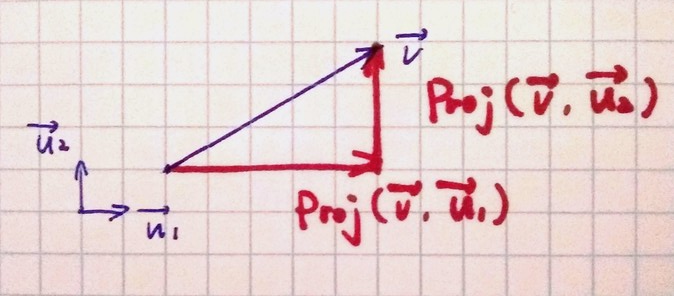

In [64]:
Image('data/orthogonality.png')

 If you can use *projections* as many as the dimension of the vector, you can perfectly reconstruct the original vector. What should we do if we can't? Notice the similarity of this question and the problem we had to solve the linear regression model. The problem was that $\boldsymbol{y}$ was not in the *range* of $X$.
 
The geometric approach to the linear regression model is to get the *projection* of $\boldsymbol{y}$ onto the *range* of $X$ like the image below. The approximated target vector $\boldsymbol{y}$ is the orange one.

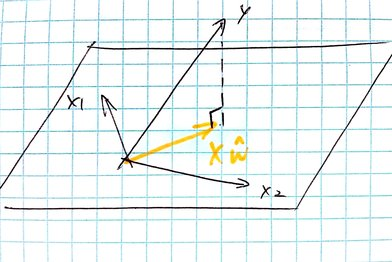

In [65]:
Image('data/geometric-sol.png')

The component of $\boldsymbol{y}$ which is *orthogonal* to the *range* of $X$ is the difference between $\boldsymbol{y}$ and $X\hat{\boldsymbol{w}}$.

$$\boldsymbol{y}-X\hat{\boldsymbol{w}}$$

We know this vector is *orthogonal* to any vector on the plane including all the column vectors of $X$. It means that their *dot product* is zero. Collectively, it can be formulated as the equation below.

$$X \perp (\boldsymbol{y} - X\hat{\boldsymbol{w}})$$

\begin{align}
X \cdot (\boldsymbol{y} - X\hat{\boldsymbol{w}}) &= 0 \\
X^T(\boldsymbol{y} - X\hat{\boldsymbol{w}}) &= 0 \\
X^T\boldsymbol{y} - X^T X\hat{\boldsymbol{w}} &= 0
\end{align}

$$\boldsymbol{w} = {(X^T X)}^{-1}X^T\boldsymbol{y}$$

This solution is exactly what we got from the algebraic and analytical approach.

## 5. Conclusion

We reviewed the basic operations and properties of linear algebra through the linear regression model. Also, we have shown that the weights of the model can be solved as $\boldsymbol{w} = {(X^T X)}^{-1}X^T\boldsymbol{y}$ by several approaches. Unfortunately, however, this form of solution is almost never used for the real world problems for mainly two reasons. First, computing the *inverse* of matrix is too expensive ($\mathcal{O}(n^3)$) to be practical. Second, it is unstable especially when $X$ is almost *singular*. To learn more about singularity and linear algebra in general, please refer the Appendix A.

## Appendix

### A. Linear algebra visualized

Are you curious why matrices have to be *full rank* to be *invertible*? What that means to multiply a vector by a matrix or to multiply matrices by their *inverse*? Watch these videos. These are some selections from a 15-ish series of linear algebra short course. It visualizes abstract concepts very very very well. I recommend everybody to watch this series [3].

In [66]:
HTML('<iframe width="240" height="135" src="https://www.youtube.com/embed/kYB8IZa5AuE?rel=0" frameborder="0" allowfullscreen></iframe>')

In [67]:
HTML('<iframe width="240" height="135" src="https://www.youtube.com/embed/uQhTuRlWMxw?rel=0" frameborder="0" allowfullscreen></iframe>')

In [68]:
HTML('<iframe width="240" height="135" src="https://www.youtube.com/embed/LyGKycYT2v0?rel=0" frameborder="0" allowfullscreen></iframe>')

### B. Transpose and 1-dimensional arrays in NumPy

You might be wondering why vectors are printed horizontally in NumPy. When 1d arrays are used, NumPy does not distinguish column vectors and row vectors unlike mathematical expressions. To see this:

In [69]:
a = np.array(np.arange(0, 3))
at = a.transpose()
print(a, at)
print(a.shape, at.shape)

[0 1 2] [0 1 2]
(3,) (3,)


To create a column vector, you need to create an n by 1 2D array explicitly.

In [70]:
a = np.array([[i] for i in range(3)])
print(a)
print(a.shape)
print(a.T)

[[0]
 [1]
 [2]]
(3, 1)
[[0 1 2]]


Note that in order to access the $i$ th element of a column vector $\boldsymbol{y}$, we need to use `y[i][0]`, not `y[i]`. Also, we cannot easily mask/index arrays with `(n, 1)` array like we can with `(n,)` arrays. These subtle differences often cause a bug (at least for me). Therefore, although we use column vectors in mathematical expression, I recommend using `(n,)` arrays in code unless you really need `(n, 1)` arrays. In case you want to collapse dimensions, you can use `ravel()` method.

In [71]:
print(a.ravel())

[0 1 2]


Read this [document](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html) to learn about NumPy indexing more. It's powerful!

### C. Outer products in NumPy

The outer product $\boldsymbol{u}\otimes\boldsymbol{v}$ is defined as the vector multiplication $\boldsymbol{u}\boldsymbol{v}^{T}$, where $\boldsymbol{u}\in\mathbb{R}^{m}$ and $\boldsymbol{v}\in\mathbb{R}^{n}$ are column vectors. Note that $\boldsymbol{v}^{T}$ becomes a row vector. For example, if $m=3$ and $n=2$, then

$$\boldsymbol{u}\otimes\boldsymbol{v}=\boldsymbol{u}\boldsymbol{v}^{\mathrm{T}}=
\begin{bmatrix}
u_{1} \\
u_{2} \\
u_{3}
\end{bmatrix}
\begin{bmatrix}v_{1} & v_{2}\end{bmatrix}=
\begin{bmatrix}
u_{1}v_{1}&u_{1}v_{2} \\
u_{2}v_{1}&u_{2}v_{2} \\
u_{3}v_{1}&u_{3}v_{2}
\end{bmatrix}.$$

Or generally, $\boldsymbol{u}\otimes\boldsymbol{v}$ is a $m\times n$ matrix whose entries are given by,

$$(\boldsymbol{u}\otimes\boldsymbol{v})_{ij}=\boldsymbol{u}_{i}\boldsymbol{v}_{j}.$$

To calculate this, you might want to do something like the following.

In [72]:
u = np.array([1, 2, 3])
v = np.array([2, 2])
try:
    print(np.dot(u, v.T))
except ValueError as e:
    print(e)

shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)


I told you, it doesn't work. Why? because the $u$ and $v$ in the above code are not column vectors. They are just arrays so that you cannot transpose them. There are two options to handle this.

1. Explicitly add another dimension to $u$ and $v$.
2. Keep them as arrays and use `outer` method provided by NumPy.

In [73]:
# Option 1 
u = np.array([1, 2, 3])[:, np.newaxis]
v = np.array([2, 2])[:, np.newaxis]
print(u.shape, v.T.shape)
print(np.dot(u, v.T))

(3, 1) (1, 2)
[[2 2]
 [4 4]
 [6 6]]


In [74]:
# Option 2
u = np.array([1, 2, 3])
v = np.array([2, 2])
print(u.shape, v.shape)
print(np.outer(u, v))

(3,) (2,)
[[2 2]
 [4 4]
 [6 6]]


You know which option I recommend.

## Reference

[1] Breen, J., 2015. Understanding the Dot Product and the Cross Product. Available online: http://www.math.ucla.edu/~josephbreen/Understanding_the_Dot_Product_and_the_Cross_Product.pdf  
[2] Kolter, Z., 2008. Linear Algebra Review and Reference. Available online: http://cs229.stanford.edu/section/cs229-linalg.pdf  
[3] Sanderson, G. (3Blue1Brown), 2016. Essence of linear algebra. Available online: https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab

Regarding the citations from [1] and [2], terminologies were italicized and vectors were bolded by me to match the notation used in this document.